<a href="https://colab.research.google.com/github/CookiesAndWater/MAT_422/blob/main/MAT422_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Singular Value Decomposition

* **Singular Value Decomposition**: A method to turn a matrix, A, into 3 different matrices that compose A. The equation is $A = U∑V^{T}$
 * $A$ is an $m × n$ matrix with dimension of $col(A) = t$
 * The column $U$, of size $m × m$, is called the left singular vectors of A
 * $∑$ is an $m × n$ matrix where the diagonal entries are the eigenvalues of A
 * The column $V$, of size $n × n$, is called the right singular vectors of A

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import math
#Original Matrix
A = np.array([
    [5,5],
    [-1,7]])

print("We have original matrix A \n", A)

#Get USV
U,S,V, = np.linalg.svd(A)

print("\nWe have U \n", U)

print("\nWe have S \n", S)

print("\nWe have V \n", V)



We have original matrix A 
 [[ 5  5]
 [-1  7]]

We have U 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

We have S 
 [8.94427191 4.47213595]

We have V 
 [[ 0.31622777  0.9486833 ]
 [ 0.9486833  -0.31622777]]


We obtain the $U \sum V^{T}$ (where $\sum$ is S in the code) by using numpy's function SVD. Both U and V are unit vectors while S is the eigenvalues. When combined give the original matrix A.

## Low-rank matrix approximations

* **Low-rank matrix approximations**: A method to approximate a matrix by another matrix of a lower rank. We can do this using Singular Value Decomposition(SVD).

## Principal component analysis

* **Principal component analysis**: A method of reducing the dimension, while trying to keep the most important information of the data, varience.
* **Covariance**: The relation between two variables, how they change together. The equation is $cov(x) = \frac{1}{n-1} \sum (x_{i} - \bar{x}) (y_{i} - \bar{y})$

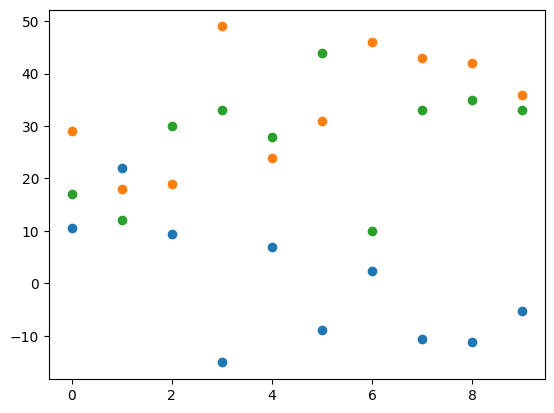

In [36]:
#Test data set
X = np.random.randint(10,50,20).reshape(10,2)
X_mean = X - np.mean(X, axis = 0)

#Covariance matrix of X_mean
covarience = np.cov(X_mean , rowvar = False)

#Getting the EigenValues and Eigenvectors
eig_val , eig_vec = np.linalg.eigh(covarience)

#Sort EigenValue and EigenVector
sorted_index = np.argsort(eig_val)[::-1]

sort_eig_val = eig_val[sorted_index]
sort_eig_vec = eig_vec[:,sorted_index]

#We can select how much we want to reduce the dimesionality, n
n = 1
eig_vec_subset = sort_eig_vec[:,0:n]

X_reduced = np.dot(eig_vec_subset.transpose(), X_mean.transpose()).transpose()


x = np.arange(0, 10, 1)

plt.plot(x,X_reduced, marker = "o", linestyle = "")
plt.plot(x,X, marker = "o", linestyle = "")

The code is explained in the comments. We generate a random data set, X, where we obtain the covarience. We then obtain the eigenvalues and eigenvectros from the covarience. We then organizing the eigenvalue by their value, which also organizes them by their variablity, since a higher eigenvalue means a higher eigenvector. We then choose how much we want to reduce the dimensionality by the value n, which chooses n values form the eigenvector. We then calculate the reduced matrix X.

An example of Principal Component Analysis would be data compression, keeping the most important part of the data while reducing it. It can be seen with pictures. When they are compressed, they look bad but still you can make out the general details of it.